<h2>Installing Librosa</h2>

In your Jupyter Notebook environment, navigate to "new" and select "terminal"
![title](imgs/new_terminal.PNG)

Install the Librosa library via PIP
![title](imgs/pip_install.PNG)

<h2>Test Run</h2>

In [1]:
import librosa
print(librosa.__version__)

0.7.2


In [9]:
y, sr = librosa.load(librosa.util.example_audio_file())
print("audio buffer length: ", len(y), ", sampling rate: ", sr)

audio buffer length:  1355168 , sampling rate:  22050


<h2>Resampling</h2>

In [3]:
new_sr = 44100
y = librosa.resample(y, sr, new_sr)


<h2>Display interactive plots directy in Jupyter Notebook</h2>

In [13]:
#matplotlib as basis, used by librosa.display
import matplotlib.pyplot as plt
import librosa.display

#use styles
import matplotlib.style as ms
ms.use('seaborn-muted')

# Render interactive figures
%matplotlib nbagg

#add audio widget for playback
from IPython.display import Audio


<IPython.core.display.Javascript object>


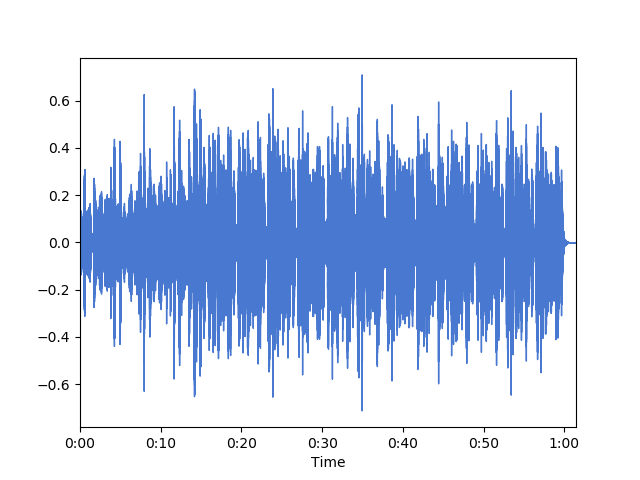

In [15]:
plt.figure()
librosa.display.waveplot(y=y, sr=new_sr)

<h2>Play your Audio Files</h2>

In [10]:
import IPython.display as ipd
ipd.Audio(y, rate=sr) # load a NumPy array

Take a listen to your resampled files...

In [11]:
new_sr = 5512
y = librosa.resample(y, sr, new_sr)

ipd.Audio(y, rate=new_sr) # load a NumPy array

<h2>Extracting features correctly</h2>
Librosa offers many options to extract all kinds of features from an audio stream - but watch out for format of the data you're getting

Sometimes it is straight-foward:

In [16]:
librosa.feature.zero_crossing_rate(y)

array([[0.02490234, 0.04150391, 0.04492188, ..., 0.00585938, 0.00292969,
        0.00292969]])

Sometimes some manual steps are required:

In [19]:
#EXTRACT ENERGY
import numpy as np

hop_len = 256
frame_len = 512
energy = np.array([sum(abs(y[i:i + frame_len] ** 2)) for i in range(0, len(y), hop_len)])
energy

array([7.25647301e-21, 1.70676455e-10, 3.96119411e-08, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [20]:
#EXTRACT TEMPO
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, aggregate=None)
tempo

array([161.49902344, 161.49902344, 161.49902344, ..., 112.34714674,
       112.34714674, 112.34714674])

Sometimes you Librosa gives you a multidimensional represenation of a feature which requires further processing to fit into the wanted format

In [35]:
hop_length = 512

mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
mfcc_averaged = mfcc.mean(axis=0)
mfcc_averaged

array([-40.93493, -40.93493, -40.93493, ..., -40.93493, -40.93493,
       -40.93493], dtype=float32)

Be sure to check the documentation before extracting a feature! <p>
http://librosa.github.io/librosa/